# Test Model

In [19]:
import numpy as np

from active import split_on_ids
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from pymks import (
    PrimitiveTransformer,
    TwoPointCorrelation,
    GenericTransformer,
)

from dask_ml.decomposition import IncrementalPCA
from dask_ml.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [96]:
def make_gp_model_matern():
    kernel = Matern(length_scale=1.0)
#    kernel = 0.5 * RBF(length_scale=1) + WhiteKernel(noise_level=1)
    regressor = GaussianProcessRegressor(kernel=kernel)
    return regressor

def make_linear_model():
    return Pipeline(steps=(
        ('poly', PolynomialFeatures(degree=3)),
        ('regressor', LinearRegression()),
    ))


In [97]:
def plot_parity(y_test, y_predict, label='Testing Data'):
    pred_data = np.array([y_test, y_predict])
    line = np.min(pred_data), np.max(pred_data)
    plt.plot(pred_data[0], pred_data[1], 'o', label=label)
    plt.plot(line, line, '-', linewidth=3, color='k')
    plt.title('Goodness of Fit', fontsize=20)
    plt.xlabel('Actual', fontsize=18)
    plt.ylabel('Predicted', fontsize=18)
    plt.legend(loc=2, fontsize=15)
    return plt

In [98]:
def train_test_split_(x_data, y_data, prop, random_state=None):
    ids = np.random.choice(len(x_data), int(prop * len(x_data)), replace=False)
    x_0, x_1 = split_on_ids(x_data, ids)
    y_0, y_1 = split_on_ids(y_data, ids)
    return x_0, x_1, y_0, y_1

In [99]:
def split(x_data, y_data, train_sizes=(0.9, 0.09), random_state=None):
    x_pool, x_, y_pool, y_ = train_test_split_(
        x_data,
        y_data,
        train_sizes[0],
        random_state=random_state
    )
    x_test, x_calibrate, y_test, y_calibrate = train_test_split_(
        x_,
        y_,
        train_sizes[1] / (1 - train_sizes[0]),
        random_state=random_state
    ) 
    return x_pool, x_test, x_calibrate, y_pool, y_test, y_calibrate

In [100]:
data = np.load('data-pca.npz')

In [101]:
x_data_pca = data['x_data_pca'][:]
y_data = data['y_data']

In [102]:
x_pool, x_test, x_train, y_pool, y_test, y_train = split(x_data_pca, y_data, (0.6, 0.2))

In [103]:
x_train.shape

(100, 15)

In [104]:
x_test.shape

(100, 15)

In [105]:
#model = make_linear_model()
model = make_gp_model_matern()

In [106]:
model.fit(x_train, y_train)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5))

In [107]:
y_train_predict = model.predict(x_train)

In [108]:
y_test_predict = model.predict(x_test)

<module 'matplotlib.pyplot' from '/nix/store/jxw66ys316i53h627jgq09sxjgy2sbvp-python3-3.10.1-env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

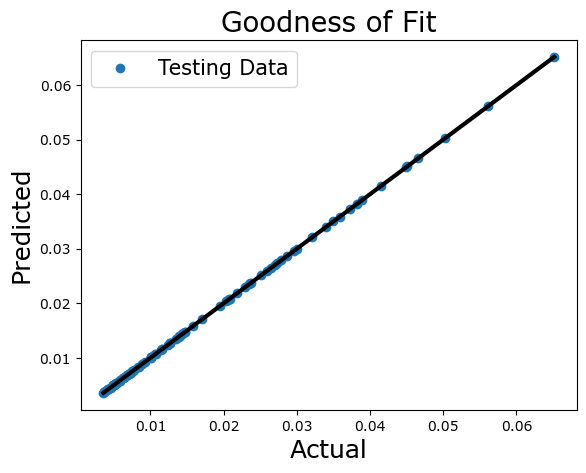

In [109]:
plot_parity(y_train, y_train_predict)

<module 'matplotlib.pyplot' from '/nix/store/jxw66ys316i53h627jgq09sxjgy2sbvp-python3-3.10.1-env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

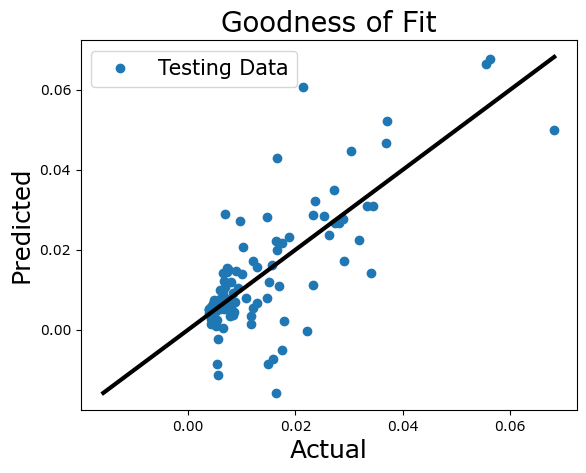

In [110]:
plot_parity(y_test, y_test_predict)

In [111]:
print(r2_score(y_test, y_test_predict))
#print(y_test.shape)
#print(y_test)
print(model.score(x_test, y_test))
#sklearn.metrics.r2_score()

0.28912562850891155
0.28912562850891155


In [112]:
scores = []
for _ in range(40):
    x_pool, x_test, x_train, y_pool, y_test, y_train = split(x_data_pca, y_data, (0.0, 0.2))
    model = make_gp_model_matern()
    model.fit(x_train, y_train)
    print(x_train.shape)
    scores += [model.score(x_test, y_test)]
    
print(scores)

(400, 15)


/nix/store/jxw66ys316i53h627jgq09sxjgy2sbvp-python3-3.10.1-env/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
(400, 15)
[0.6264484390776518, 0.4671119625846244, 0.7115857374206267, 0.3650900410249278, 0.6291090537027014, 0.6263148420746478, 0.5910271750352989, 0.4216684086524425, 0.46406428258844423, 0.5066693748244515, 0.673766382009692, 0.39922491061204324, 0.42771580298951983, 0.6068709096033215, 0.6384857396584513, 0.25637254597144343, 0.5058661218903427, 0.6861235907797083, 0.45257106340571895, 0.532429727921576, 0.4420147335704937, 0.7379404368219108, 0.5250889200819224, 0.6499064777593155, 0.5165676840258377, 0.41609397785484503, 0.6939449086760351, 0.4620357893544449, 0.38006287525057936, 0.6707484253365636, 0.63

In [113]:
np.mean(scores)

0.5421554396657763

In [114]:
np.std(scores)

0.11400580127565335